# 0. Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')


# 1. The Continuous Fourier Transform

## a. Basic Background

A periodic function $f$ admits a Fourier series expression

\begin{equation}f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \bigg( a_n \cos\bigg( \frac{2\pi}{P}nx \bigg) + b_n \sin \bigg(\frac{2\pi}{P}nx \bigg) \bigg)\end{equation}

where $P$ is the period of $f$. This states that $f$ can be represented as the linear combination of sines and cosines with different periods.

Note that we take $n$ to infinity to obtain an exact series. If $n$ is finite, then we have an approximation.

We compute the coefficients as

\begin{equation} a_0 = \frac{2}{P} \int_{P} f(x) \ dx  \\ a_n = \frac{2}{P} \int_{P} f(x)\cos(nx)\ dx  \\ b_n = \frac{2}{P} \int_{P} f(x)\sin(nx) \ dx \end{equation}

The $a_0$ is the average value of the function over one period. The $a_n$ and $b_n$ correspond to the "significance" of each of the $\cos(nx)$ and respectively $\sin(nx)$ in the Fourier series expansion of the function.

In [5]:
def plot_function(f, lb = 0, ub = 20, no_points = 2000, name = ''):
    
    """Plot points of any function in a define domain"""
    
    plt.title(f'f(x) = {name}')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    domain = np.linspace(lb, ub, no_points)
    
    plt.plot(domain, f(domain))
    plt.show()

Suppose we have the function $f(x) = \sin(\cos(x))$. We plot this function below to see that it is periodic.

In [17]:
f = lambda x: np.sin(2*x) + np.cos(3*x)

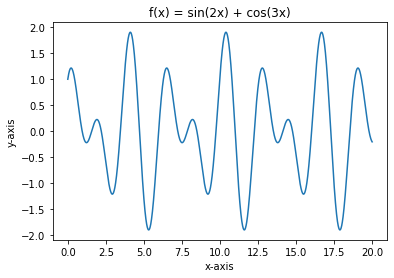

In [18]:
plot_function(f, name = 'sin(2x) + cos(3x)')

We now attempt to find the first 3 $a_n$ and $b_n$ of the Fourier series to approximate the function $f$ 

In [13]:
class FourierApproximation:
    
    def __init__(self, f, period, nth, no_points):
        
        self.f = f
        self.period = period
        self.nth = nth
        self.no_points = no_points
        
    def find_a_0(self):
        return 2/self.period * quad(self.f, 0, self.period)[0]
    
    def find_a_n(self, k):
        return 2/self.period * quad(lambda x: self.f(x) * np.cos(k*x),
                                    0, self.period)[0]
    def find_b_n(self, k):
        return 2/self.period * quad(lambda x: self.f(x) * np.sin(k*x),
                                    0, self.period)[0]
    def approximate_f(self):
        
        self.x = np.linspace(0, self.period, self.no_points)
        
        self.a_0 = self.find_a_0()
        self.a_n = [self.find_a_n(k) for k in range(1, self.nth+1)]
        self.b_n = [self.find_b_n(k) for k in range(1, self.nth+1)]

        self.c_n = np.sum([self.a_n[k-1] * np.cos(k*self.x) for k in range(self.nth)], axis = 0)
        self.s_n = np.sum([self.b_n[k-1] * np.sin(k*self.x) for k in range(self.nth)], axis = 0)

        self.f_n = self.a_0/2 + self.c_n + self.s_n

Let's take a look at the value of the coefficients. We see that for $a_n$, as $n$ increases, the size fo the coefficients decrease quite quickly.

In [14]:
approx = FourierApproximation(f, period = 2*np.pi, nth = 3, no_points = 2000)
approx.approximate_f()

print(f'a_0: {np.round(approx.a_0)}')
print(f'a_n: {np.round(approx.a_n, 3)}')
print(f'b_n: {np.round(approx.b_n, 3)}')

a_0: 0.0
a_n: [ 0. -0.  1.]
b_n: [-0.  1. -0.]


Now we compare the approximation side by side with the exact function.

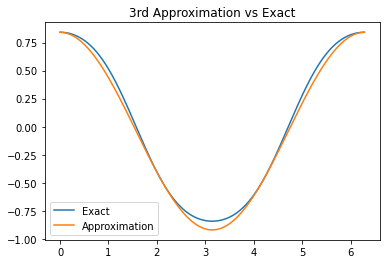

In [10]:
plt.title(f'{approx.nth}rd Approximation vs Exact')
plt.plot(approx.x, f(approx.x))
plt.plot(approx.x, approx.f_n)
plt.legend(['Exact', 'Approximation'])

## b. The Complex Fourier Series

Using Euler's formula, we can solve for cosine and sine to get

\begin{equation} \cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} \quad , \quad \sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} \end{equation}

Substitute the above complex expansion into the original Fourier series, we get the complex Fourier series.

\begin{equation}f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \bigg( a_n \frac{e^{i\frac{2\pi}{P}nx} + e^{-i\frac{2\pi}{P}nx}}{2} + b_n \frac{e^{i\frac{2\pi}{P}nx} - e^{-i\frac{2\pi}{P}nx}}{2i} \bigg)\end{equation}

Further rearrangement give us

\begin{equation} f(x) = \frac{a_0}{2} + \sum^{\infty}_{n=1} \frac{a_n - ib_n}{2} e^{i\frac{2\pi}{P}nx} + \sum^{\infty}_{n=1}\frac{a_n + ib_n}{2} e^{-i\frac{2\pi}{P}nx}\end{equation}

Now with a little renaming, we get

\begin{equation} f(x) = \sum^{\infty}_{n = -\infty} c_n e^{i \frac{2\pi}{P}nx} \end{equation}

where,

\begin{equation}c_n \equiv \begin{cases} \frac{1}{2}a_0, \quad &n = 0 \\ \frac{1}{2}(a_n - ib_n), \quad &n > 0 \ . \\ \frac{1}{2}(a_{-n} + ib_{-n}), \quad &n<0\end{cases}\end{equation}

and with this there is a better formula for computing the coefficients $c_n$.

\begin{equation} c_n = \frac{1}{P} \int_{P} e^{-i\frac{2\pi}{P}nx} f(x) \ dx \end{equation}

## c. The Fourier Transform

Now assume we have an integrable function $f: \mathbb{R} \mapsto \mathbb{C}$. We can ask the question "How much of a certain real-valued frequency does $f$ has?"

For all real frequency $\zeta$, we define the Fourier transform as 

\begin{equation} \hat{f}(\zeta) = \int^{\infty}_{-\infty} f(x) e^{-2\pi i x \zeta} \ dx \end{equation}

We say that the Fourier Transform maps from the time domain $f(x)$ to the frequency domain $\hat{f}(\zeta)$.

# 2. The Discrete Fourier Transform

## a. The Inverse Discrete Fourier Transform

In practical settings, we will never encounter continuous data or data that spans to infinity. What we usually see instead are discrete and finite data. Because of this, we have to apply a different type of analysis called the Discrete Fourier Transform.

Now suppose we have a sequence of complex of $N$ complex numbers $\{x_n\} = x_0, x_1, ..., x_{N-1}$. For simplicity, assume $N$ is even. Outside the domain, $\{0, 1, ..., N-1\}$, we assume our function to be $N$-periodic. Essentially, we equally sample a complex-valued periodic function.

Similarly to before, our sequence admits an expression as sums of periodic sequence.

\begin{equation}x_n = \frac{1}{\sqrt{N}} \sum_{k = 0}^{N-1}X_k \cdot e^{i\frac{2\pi}{N}kn} \end{equation}

where $X_k$ is a complex coefficients describing the amplitude and phase of the corresponding $e^{i\frac{2\pi}{N}k}$. To shorten notation, we use $\omega_N = e^{-2\pi i / N}$ to denote the primitive $N$th root of unity.

If we represent $x_n$ and the corresponding frequency coefficients $X_k$ as column vectors, then we can express the Fourier series as a matrix-vector multiplication $\text{U}|X_k\rangle = |x_n\rangle$

\begin{equation} \frac{1}{\sqrt{N}} \begin{pmatrix} \omega_N^{-0\cdot 0} & \omega_N^{-1\cdot 0} & \cdots & \omega_N^{-(N-1)\cdot 0} \\ \omega_N^{-0\cdot 1} & \omega_N^{-1 \cdot 1} & \cdots & \omega_N^{-(N-1)\cdot 1} \\ \vdots & \vdots & \ddots & \vdots \\ \omega_N^{-0\cdot (N-1)} & \omega_N^{-1\cdot (N-1)} & \cdots & \omega_N^{-(N-1)\cdot (N-1)}\end{pmatrix}\begin{pmatrix}X_0 \\ X_1 \\ \vdots \\ X_{N-1}\end{pmatrix}  = \frac{1}{\sqrt{N}} \begin{pmatrix} \omega_N^{0} & \omega_N^{0} & \cdots & \omega_N^{0} \\ \omega_N^{0} & \omega_N^{-1} & \cdots & \omega_N^{-(N-1)} \\ \vdots & \vdots & \ddots & \vdots \\ \omega_N^{0} & \omega_N^{-(N-1)} & \cdots & \omega_N^{-(N-1)\cdot (N-1)}\end{pmatrix}\begin{pmatrix}X_0 \\ X_1 \\ \vdots \\ X_{N-1}\end{pmatrix} = \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{N-1}\end{pmatrix}\end{equation}

An important observation to note is that $U$ is unitary. Recall that $U$ is unitary $\iff$ $U^{-1} = U^\dagger$. We first observe that $U^T = U$. Then all we have left to verify is that $U^{-1} = U^{*}$. (Exercise for the reader)

## b. The Discrete Fourier Transform

What we've done above is describing a way to calculate a periodic sequence from its frequency coefficients. We also prove that the map $U$ is invertible. Now if we are given the sequence $\{x_n\}$, we can calculate the Fourier coefficients $\{X_k\}$ using $\frac{1}{\sqrt{N}}\text{DFT} = U^{*}$.

We see the $\text{DFT}$ in action on a periodic sequence of 16 elements.

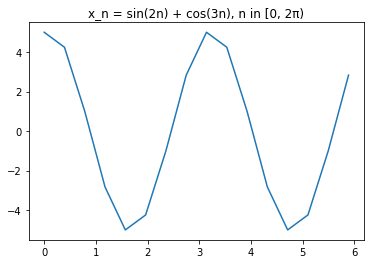

In [30]:
domain = np.arange(0, 2*np.pi, np.pi/8)

x_n = (np.sin(2*domain) + 5*np.cos(2*domain)).reshape(16, 1)

plt.title('x_n = sin(2n) + cos(3n), n in [0, 2π)')
plt.plot(domain, x_n)

Now we apply the $\text{DFT}$ to $x_n$. 

In [31]:
from scipy.linalg import dft

Observe that we see -0.5i on the 2nd entry and 0.5 on the 3rd entry (0 index) of the frequency vector. This correspond to the sin(2x) and cos(3x) respectively. The real value indicates the weight of a cosine and a complex value that of a sine.

In [32]:
from FrozenYoghourt import *

In [33]:
frequency = dft(16, scale = 'n')@x_n
view(frequency)

Matrix([
[          0],
[          0],
[2.5 - 0.5*I],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[          0],
[2.5 + 0.5*I],
[          0]])

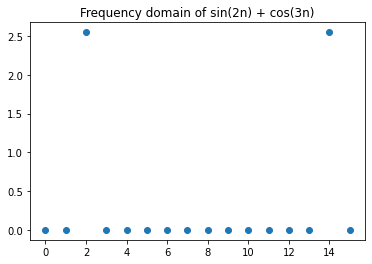

In [34]:
plt.title('Frequency domain of sin(2n) + cos(3n)')
plt.scatter(range(16), np.abs(frequency))

For completeness, note that we only look at the frequency up to $N/2$, called the Nyquist limit. We also double the Fourier coefficients to get the actual amplitude.

# 3. The Quantum Fourier Transform

## a. Construction

Coincidentally, the Quantum Fourier Transform is the $U^{*}$ matrix from above. Similarly, we have the Inverse Quantum Fourier Transform the $U$ matrix. Note that in native quantum computing notation, we have an alternative  expression for the $\text{QFT}$.

\begin{equation}QFT_N| x \rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} | y \rangle \end{equation}

Compare this with the original formulation and we see that this is just a change of notation

\begin{equation}U^{*} X_k = \frac{1}{\sqrt{N}} \sum_{k = 0}^{N-1}x_n \cdot e^{-i\frac{2\pi}{N}kn} \end{equation}

To construct the $\text{QFT}$ circuit, we need $O(n^2)$ gates.

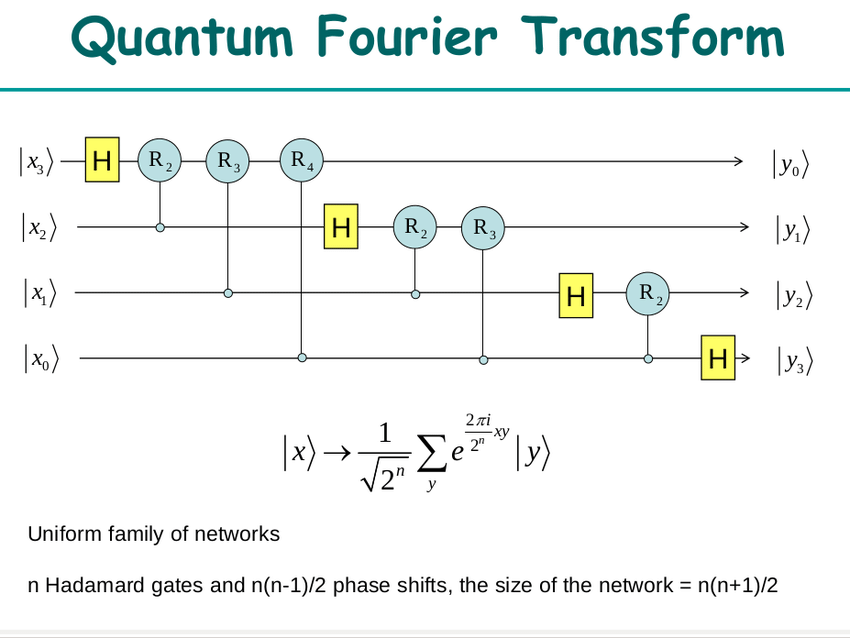

Usually, we quantifying complexity of quantum circuits, we only need to assess the two-qubit gate complexity. (Exercise for the interested reader).

$O(\# \text{2 qubits gates}) = O(\# \text{1 qubit gate})$

When decomposing a circuit into two qubits and one qubit gates. The number of non-trivial one qubits gate is at max a constant factor of the number of two qubits gate

## b. Applications

Applications of the $\text{QFT}$ includes 

- Quantum Phase Estimation [[1]](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)
- Quantum Discrete Logarithm [[2]](https://arxiv.org/abs/quant-ph/0301141)
- Quantum Factoring Algorithm [[3]](https://arxiv.org/abs/quant-ph/9508027)
- Quantum Arithmetic Subroutines [[4]](https://arxiv.org/pdf/1411.5949.pdf).

In [35]:
from qiskit import *